In [5]:
%%time
from CPT.CPT import *
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])
layout.add_measurements(measurements = points, points_type = 'initial')
layout.optimize_measurements()
layout.generate_combined_layer(points_type = 'initial')

layout.add_lidars(lidar_pos_1 = np.array([580800 - 1800,4845300 + 2500, 271]))
layout.generate_second_lidar_layer()
layout.add_lidars(lidar_pos_2 = np.array([579400 + 1200,4847700 - 2000,100]))
layout.generate_campaign_layout()
steering_angles_1, steering_angles_2 = layout.optimize_trajectory()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Adding initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Generating combined layer for initial measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Lidar 1 position added!
Lidar 2 position added!
CPU times: user 403 ms, sys: 182 ms, total: 585 ms
Wall time: 810 ms


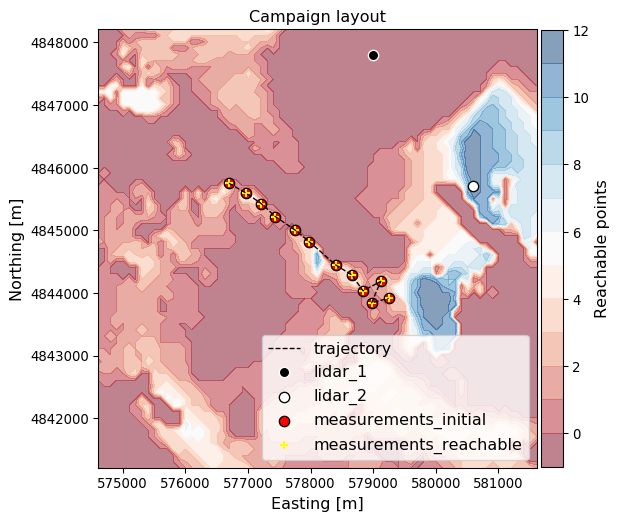

In [6]:
layout.plot_layout()